In [ ]:
from dask.distributed import Client
import pandas as pd
import numpy as np
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from dask.distributed import as_completed

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/thistleknot/Python-Stock/master/data/raw/states.csv")


In [ ]:
df_ = df.iloc[:,1:]
df_

In [ ]:
client = Client('192.168.3.100:8786')

In [ ]:
def y_subset(df):
    
    X = list ()
    
    for var_pos in range(0,len(df.columns)):
        variables=df.columns
        target=variables[var_pos]
        #print(target)
        #print(variables.isin([target]))
        temp = pd.concat([pd.DataFrame(df[target]),df_.loc[:, ~df.columns.isin([target])]],axis=1)
        #print(temp)
        X.append(temp)
    return(X)

def regress (df):
    lr = LinearRegression()

    variables=df.columns
    target = variables[0]
    
    temp = pd.concat([pd.DataFrame(df[target]),df.loc[:, ~df.columns.isin([target])]],axis=1)

    temp
    
    name = str(target)+'.csv'
    print(name)
    
    s_f_s = sfs(lr, 
              k_features=len(df.columns)-1, 
              forward=True, 
              floating=False, 
              scoring='neg_mean_squared_error',
              n_jobs=-1,
              cv=10)
    
    s_f_s_f = s_f_s.fit(temp.loc[:, ~temp.columns.isin([target])], pd.DataFrame(temp[target]))
    
    temp.to_csv(name)
    return(s_f_s_f.get_metric_dict())

In [ ]:
pwd

In [ ]:
X = y_subset(df_)

future = client.map(regress, X)

results = []
best = -1
for f in as_completed(future):
   results.append(f.result())

In [ ]:
variables=df_.columns

Poverty


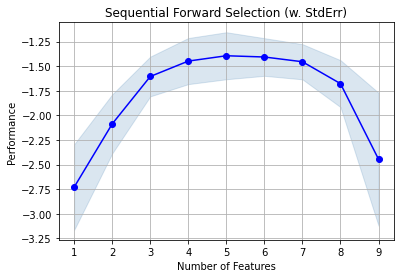

Infant Mort


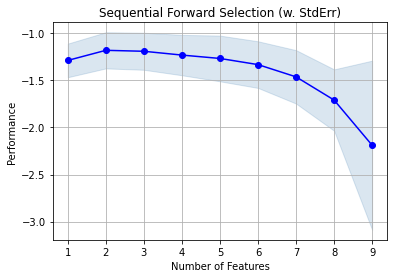

White


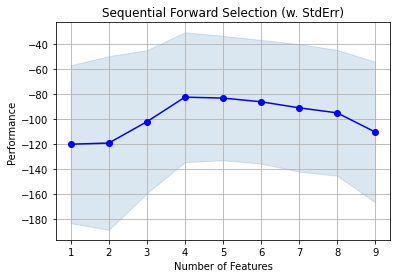

Crime


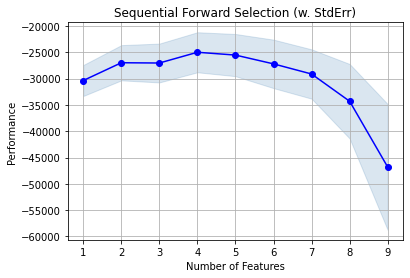

Doctors


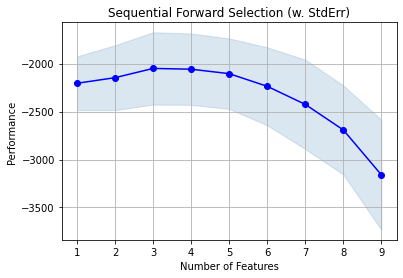

Traf Deaths


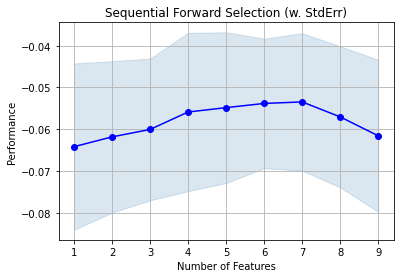

University


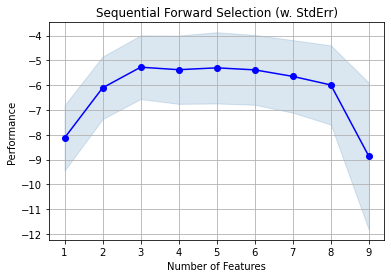

Unemployed


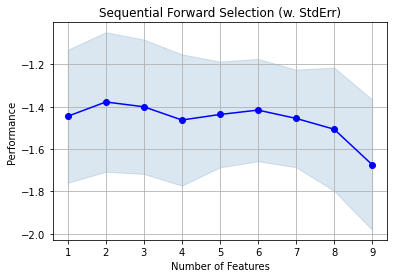

Income


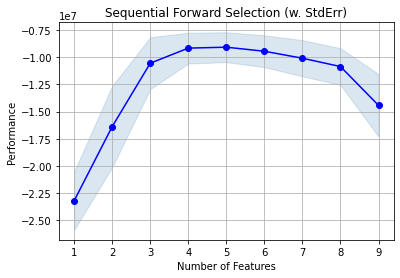

Population


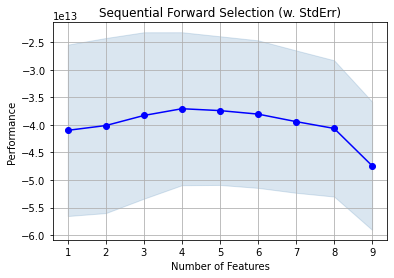

In [15]:
for f in range(0,len(future)):
    variables = df_.columns
    print(variables[f])
    target=variables[0]
    fig = plot_sfs(future[f].result(), kind='std_err')
    plt.title('Sequential Forward Selection (w. StdErr)')
    plt.savefig(str(target)+'.png', dpi=300, format='png', bbox_inches='tight')
    plt.grid()
    plt.show()
    

In [ ]:

#manual
for i in (range(0,(len(X)-1))):
    print(i)
    print(regress(X[i]))
    
